# 02-PyCUDA与图像处理-图像灰度化

In [14]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda.compiler import SourceModule
import string
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import  animation

In [4]:
def load_kernel_from_file(fname,kname):
    sources = None
    kernel = None
    with open(fname,encoding='utf-8') as f:
        sources = f.read() # 通过str函数转换为unicode编码
        sm = SourceModule(str(sources))
        kernel = sm.get_function(kname)
    return kernel

def load_kernel_from_string(sources,kname):
    sm = SourceModule(str(sources))
    kernel = sm.get_function(kname)
    return kernel

In [6]:
rgb2gray = load_kernel_from_file('../../datas/cuda/06-gamma-transform.cu.cu','rgb2gray')

In [9]:
src = cv2.cvtColor(cv2.imread('../../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [10]:
dst = np.zeros((src.shape[0],src.shape[1]),dtype=np.uint8)

In [21]:
# src_gpu = drv.mem_alloc(src.nbytes)
# dst_gpu = drv.mem_alloc(src.nbytes)

In [31]:
rows,cols = src.shape[0],src.shape[1]
block = (32,32,1)
grid = (int(cols / block[0] ),int(rows / block[1]),1)

print('block = ',block)
print('grid = ',grid)

block =  (32, 32, 1)
grid =  (20, 15, 1)


In [32]:
rgb2gray(drv.In(src),drv.Out(dst),np.int32(rows),np.int32(cols),block=block,grid=grid)

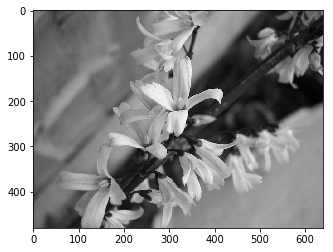

In [33]:
plt.imshow(dst,'gray')